In [32]:
pip install python-docx
pip install lxml


SyntaxError: invalid syntax (2747071370.py, line 2)

In [3]:
import pandas as pd 

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches
from docx.shared import Pt

In [7]:
# read in the first CSV file
df1 = pd.read_csv('cl_NyorkTimes.csv')

# read in the second CSV file
df2 = pd.read_csv('cl_economist.csv')

# read in the third CSV file
df3 = pd.read_csv('cl_yenisafak.csv')

# concatenate the dataframes vertically
appended = pd.concat([df1, df2, df3])

# write the concatenated dataframe to a new CSV file
appended.to_csv('appended_all.csv', index=False)

In [8]:
df1 = pd.read_csv('cl_NyorkTimes.csv')
articles.head()

,Publication,Date,Year,Month,Day,Title,Body,keywords
0,The New York Times,2018-03-30 21:31:00+00:00,2018,3,30,‘It Factory North America’ but Trump Could Hob...,What the journey of a Union Pacific locomotive...,Union Pacific Corporation Railroads Internatio...
1,The New York Times,2020-08-04 15:29:25+00:00,2020,8,4,Interest Rates Are Low but Loans Are Harder to...,Banks have tightened standards becoming more c...,Mortgages Credit and Debt Banking and Financia...
2,The New York Times,2022-04-20 09:00:37+00:00,2022,4,20,With Inflation Workers Are Facing Return-to-Of...,The cost of a daily routine travel coffee foo...,Coronavirus Return to Office Prices Fares Fees...
3,The New York Times,2017-07-25 21:13:33+00:00,2017,7,25,Recent Commercial Real Estate Transactions,Recent commercial real estate transactions in ...,Real Estate and Housing Residential Real Estat...
4,The New York Times,2016-08-10 09:00:28+00:00,2016,8,10,Think Amazon Drone Delivery Idea Is a Gimmick?...,Amazon doesn’t reveal much but a little sleuth...,Amazoncom Inc Delivery Services Drones Pilotle...


In [4]:
# # reading the Appended_all.csv into a pandas dataframe
articles = pd.read_csv('appended_all.csv')

In [5]:
articles.head()

,Publication,Date,Year,Month,Day,Title,Body,keywords
0,The New York Times,2018-03-30 21:31:00+00:00,2018,3,30,‘It Factory North America’ but Trump Could Hob...,What the journey of a Union Pacific locomotive...,Union Pacific Corporation Railroads Internatio...
1,The New York Times,2020-08-04 15:29:25+00:00,2020,8,4,Interest Rates Are Low but Loans Are Harder to...,Banks have tightened standards becoming more c...,Mortgages Credit and Debt Banking and Financia...
2,The New York Times,2022-04-20 09:00:37+00:00,2022,4,20,With Inflation Workers Are Facing Return-to-Of...,The cost of a daily routine travel coffee foo...,Coronavirus Return to Office Prices Fares Fees...
3,The New York Times,2017-07-25 21:13:33+00:00,2017,7,25,Recent Commercial Real Estate Transactions,Recent commercial real estate transactions in ...,Real Estate and Housing Residential Real Estat...
4,The New York Times,2016-08-10 09:00:28+00:00,2016,8,10,Think Amazon Drone Delivery Idea Is a Gimmick?...,Amazon doesn’t reveal much but a little sleuth...,Amazoncom Inc Delivery Services Drones Pilotle...


In [6]:

# getting basic info about the dataset

articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Publication  10324 non-null  object
 1   Date         10324 non-null  object
 2   Year         10324 non-null  int64 
 3   Month        10324 non-null  int64 
 4   Day          10324 non-null  int64 
 5   Title        10324 non-null  object
 6   Body         10174 non-null  object
 7   keywords     1965 non-null   object
dtypes: int64(3), object(5)
memory usage: 645.4+ KB


In [7]:
# checking for null values, if any

articles.isnull().sum()

Publication       0
Date              0
Year              0
Month             0
Day               0
Title             0
Body            150
keywords       8359
dtype: int64

<AxesSubplot:xlabel='Publications', ylabel='Counts'>

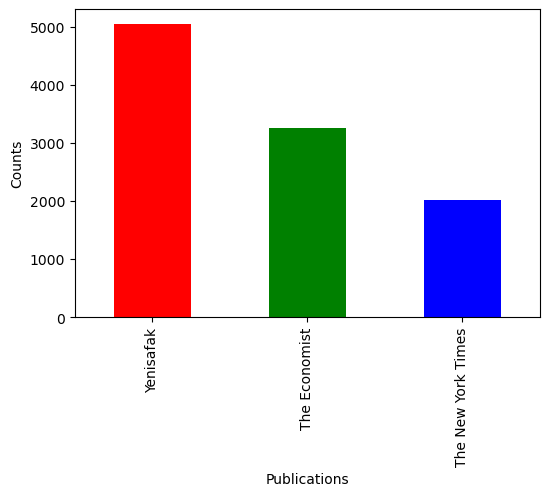

In [12]:
# Visualization of news publications names and article count in the dataset
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(6,4))

plt.xlabel("Publications")
plt.ylabel("Counts")

articles.Publication.value_counts().plot(kind='bar', color=color_list)

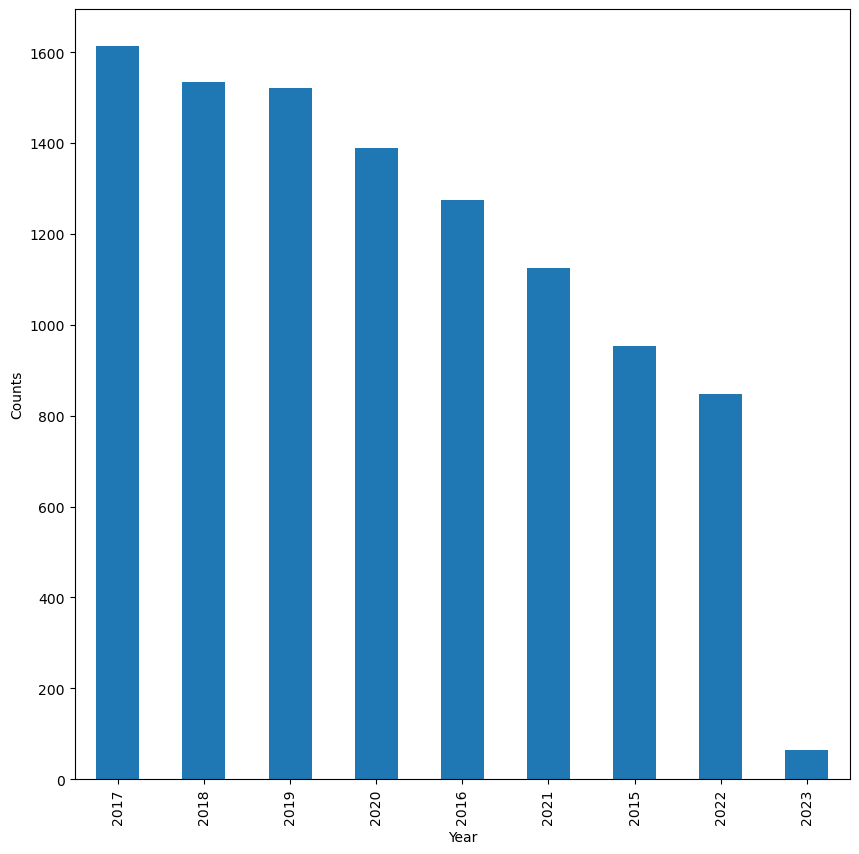

In [5]:
# Visualization of news article count per year

articles['Year'] = articles['Year'].map(int).map(str)
articles['Year'] = pd.to_datetime(articles['Year'], format='%Y').dt.strftime('%Y')
articles = articles.sort_values(by='Year')

plt.figure(figsize=(10,10))
plt.xlabel("Year")
plt.ylabel("Counts")

articles.Year.value_counts().plot(kind='bar')
plt.show()

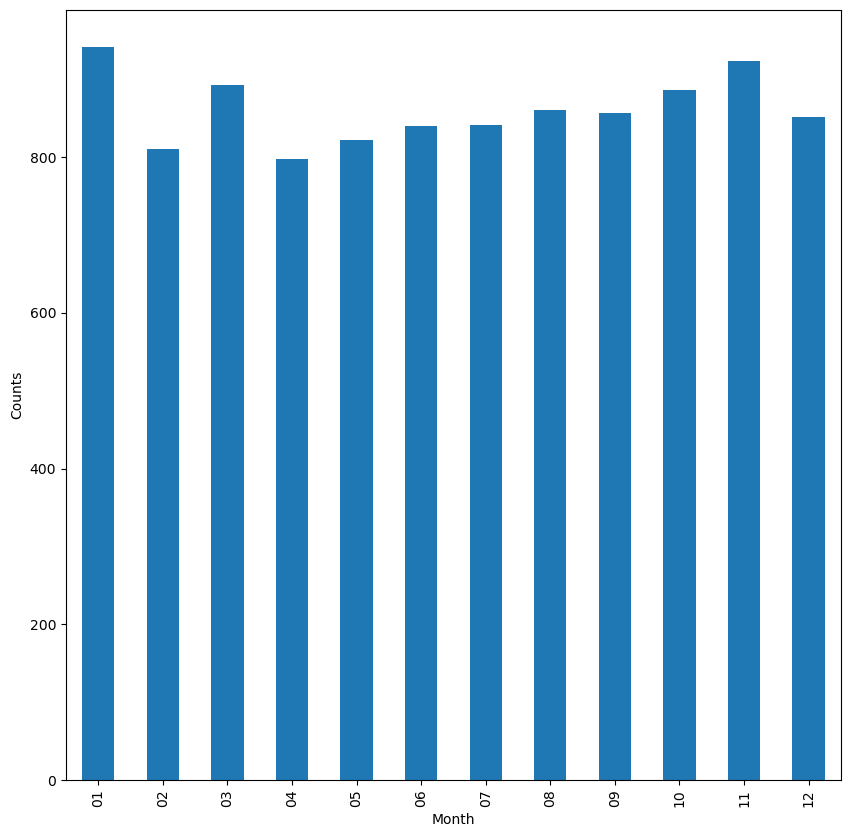

In [9]:
# # Visualization of news article count released monthly to observe if any pattern exists 

# articles['Month'] = articles['Month'].map(int).map(str)
# articles['Month'] = pd.to_datetime(articles['Month'], format='%m').dt.strftime('%m')
# articles = articles.sort_values(by='Month')

# plt.figure(figsize=(10,10))
# plt.xlabel("Month")
# plt.ylabel("Counts")

# articles.Month.value_counts().plot(kind='bar')
#plt.show()


# Convert the "Month" column to datetime format and extract the month as a string
articles['Month'] = pd.to_datetime(articles['Month'], format='%m').dt.strftime('%m')

# Count the number of articles released each month and sort by month
monthly_counts = articles['Month'].value_counts().sort_index(ascending=True)

# Plot the bar chart of article counts by month
plt.figure(figsize=(10,10))
plt.xlabel("Month")
plt.ylabel("Counts")
monthly_counts.plot(kind='bar')
plt.show()


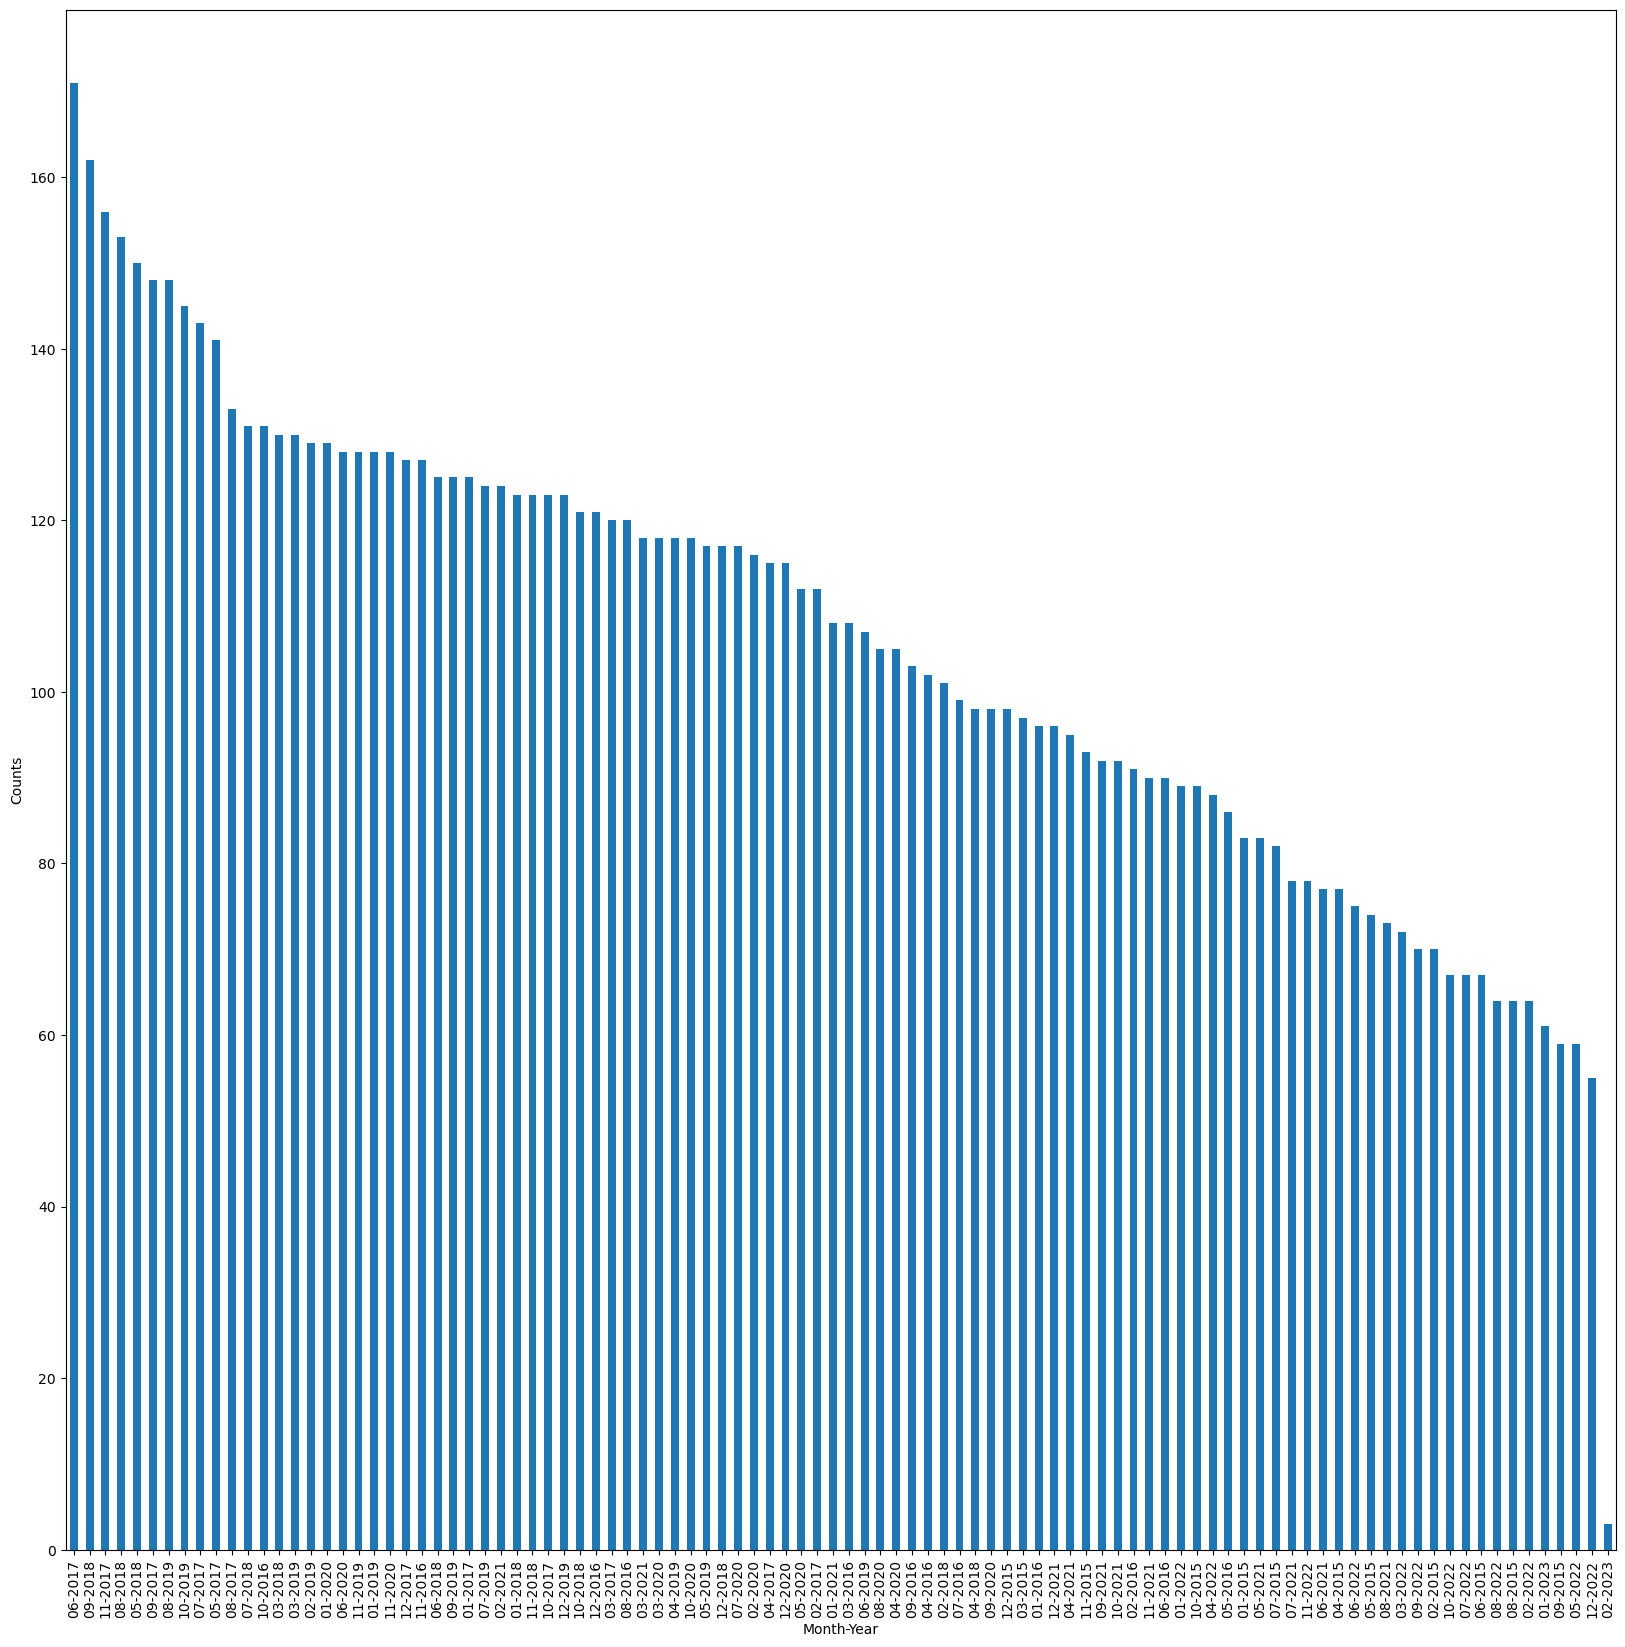

In [7]:
# Visualization of news article count per month-year

articles['my'] = articles['Month'].map(int).map(str) + '-' + articles['Year'].map(int).map(str)
articles['my'] = pd.to_datetime(articles['my'], format='%m-%Y').dt.strftime('%m-%Y')
articles = articles.sort_values(by='my')

plt.figure(figsize=(20,20))
plt.xlabel("Month-Year")
plt.ylabel("Counts")

articles.my.value_counts().plot(kind='bar')
plt.show()

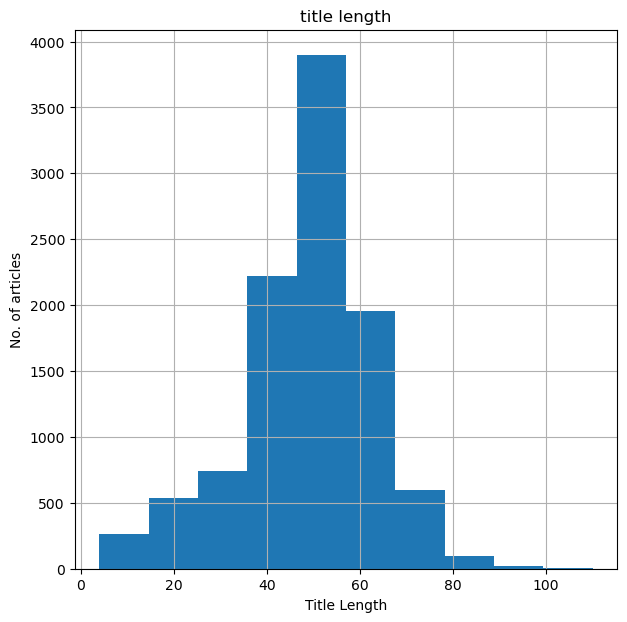

In [8]:
# visualizing title length

plt.figure(figsize=(7,7))
plt.xlabel("Title Length")
plt.ylabel("No. of articles")
plt.title('title length')
articles['Title'].str.len().hist()
plt.savefig('title length.png')
# Create a new Word document
document = Document()
# Add the chart image to the document
document.add_picture('title length.png', width=Inches(6))

# Save the document
document.save('title length.docx')

In [35]:
#If you wanted to open an existing document you would just specify the path of that document in the brackets as follows:

document = Document("existing-file.docx")

# Part of Speech Tagging

In [38]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

sms['pos_tags'] = sms['stopwords_removed'].apply(nltk.tag.pos_tag)
sms.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


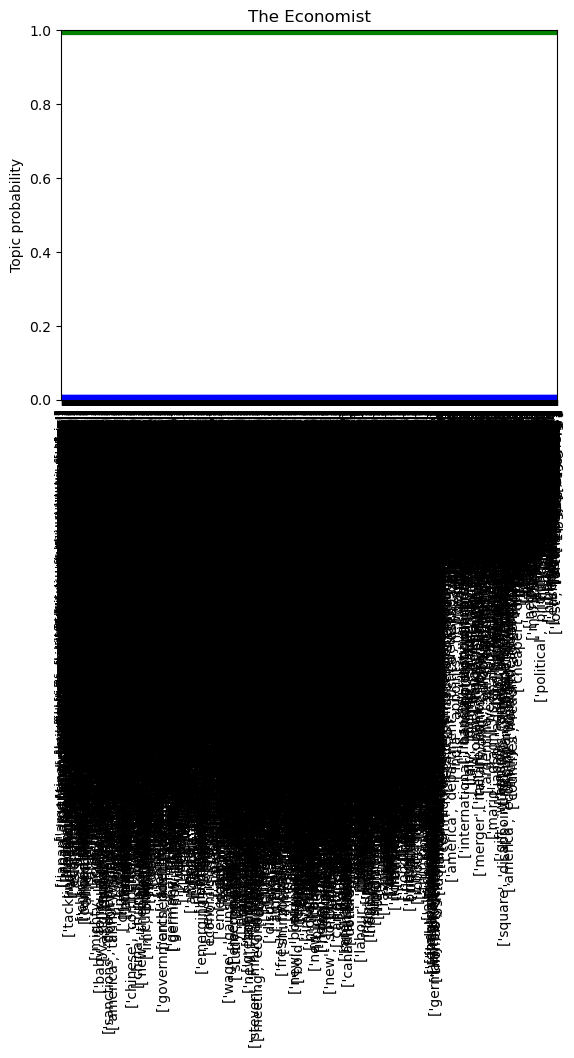

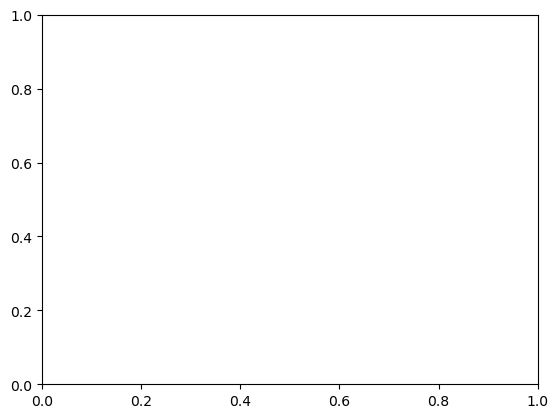

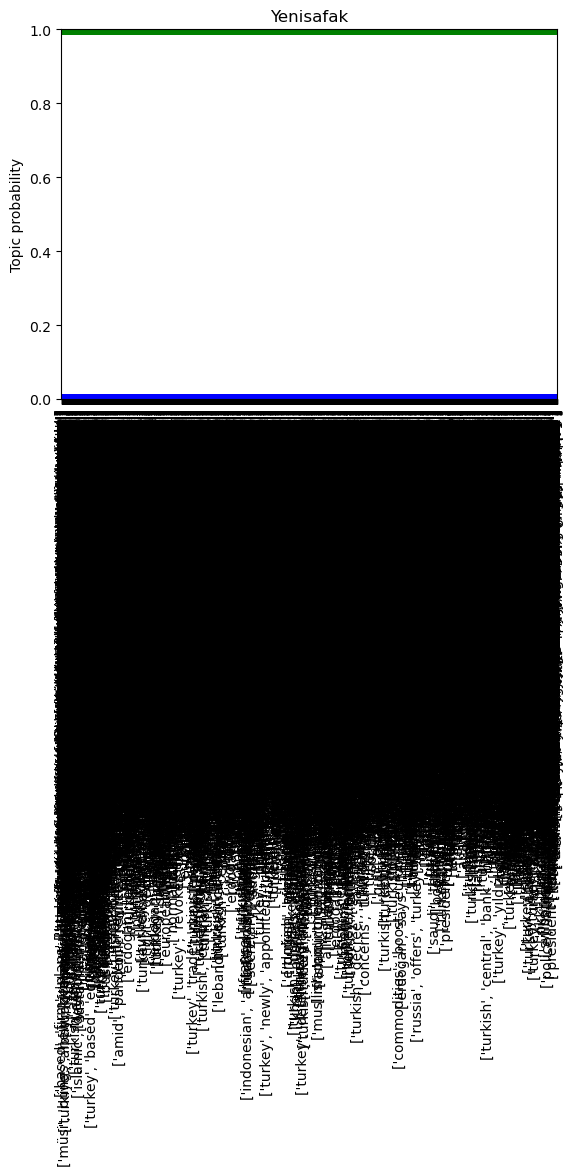

In [ ]:
y = "The New York Times"
corpus = dtf[dtf["y"]==y]["text_clean"]

## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)
## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)
## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 
## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=3, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])
    
## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()